<a href="https://colab.research.google.com/github/FabioMMaia/Anomalies_Categorics/blob/main/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Ignorar o aviso de depreciação relacionado ao IPython
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Exemplo de transações de compras
transactions = [
    ['Leite', 'Pão', 'Ovos'],
    ['Leite', 'Pão', 'Maçãs'],
    ['Pão', 'Bananas'],
    ['Leite', 'Pão', 'Ovos'],
    ['Ovos', 'Bananas']
]

# Instanciação do TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Criação do DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicação do algoritmo Apriori para encontrar itens frequentes
frequent_itemsets = apriori(df, min_support=1e-12, use_colnames=True)

# Cálculo das regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Maçãs),(Leite),0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
1,(Pão),(Leite),0.8,0.6,0.6,0.75,1.250000,0.12,1.6,1.000000
2,(Leite),(Pão),0.6,0.8,0.6,1.00,1.250000,0.12,inf,0.500000
3,(Maçãs),(Pão),0.2,0.8,0.2,1.00,1.250000,0.04,inf,0.250000
4,"(Pão, Maçãs)",(Leite),0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
5,"(Maçãs, Leite)",(Pão),0.2,0.8,0.2,1.00,1.250000,0.04,inf,0.250000
6,(Maçãs),"(Pão, Leite)",0.2,0.6,0.2,1.00,1.666667,0.08,inf,0.500000
7,"(Ovos, Pão)",(Leite),0.4,0.6,0.4,1.00,1.666667,0.16,inf,0.666667
8,"(Ovos, Leite)",(Pão),0.4,0.8,0.4,1.00,1.250000,0.08,inf,0.333333


In [4]:
transactions = pd.read_csv('/content/drive/MyDrive/Projeto ML/2024/Anomalies em Categoricas/store_data.csv',header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
transactions.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)

In [6]:
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
list_values = []
for i,row in transactions.iterrows():

  list_values.append(list(row.dropna()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
len(list_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7501

In [9]:
# list_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Instanciação do TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(list_values).transform(list_values)
df_ohe = pd.DataFrame(te_ary, columns = te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df_ohe.iloc[:5,:8]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce
0,False,True,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False


In [12]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.4,(Bananas)
1,0.6,(Leite)
2,0.2,(Maçãs)
3,0.6,(Ovos)
4,0.8,(Pão)
5,0.2,"(Ovos, Bananas)"
6,0.2,"(Pão, Bananas)"
7,0.2,"(Maçãs, Leite)"
8,0.4,"(Ovos, Leite)"
9,0.6,"(Pão, Leite)"


In [14]:
# Aplicação do algoritmo Apriori para encontrar itens frequentes
frequent_itemsets = apriori(df_ohe, min_support=1e-5, max_len=3, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.000133,( asparagus)
1,0.020397,(almonds)
2,0.008932,(antioxydant juice)
3,0.004666,(asparagus)
4,0.033329,(avocado)
...,...,...
64794,0.000133,"(vegetables mix, whole wheat pasta, whole whea..."
64795,0.000133,"(whole wheat pasta, white wine, whole wheat rice)"
64796,0.000133,"(whole weat flour, whole wheat pasta, whole wh..."
64797,0.000133,"(whole wheat pasta, yams, whole wheat rice)"


In [16]:
# dir(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Cálculo das regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1e-5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
rules.sort_values(by='lift', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
201636,"(spaghetti, soup)",(cookies),0.014265,0.080389,0.000133,0.009346,0.116257,-0.001013,0.928286,-0.885211
201637,(cookies),"(spaghetti, soup)",0.080389,0.014265,0.000133,0.001658,0.116257,-0.001013,0.987373,-0.892080
4688,(cookies),(energy bar),0.080389,0.027063,0.000267,0.003317,0.122556,-0.001909,0.976175,-0.886174
4689,(energy bar),(cookies),0.027063,0.080389,0.000267,0.009852,0.122556,-0.001909,0.928761,-0.880364
113705,"(frozen vegetables, mineral water)",(butter),0.035729,0.030129,0.000133,0.003731,0.123844,-0.000943,0.973503,-0.880050
...,...,...,...,...,...,...,...,...,...,...
65183,"(spinach, blueberries)",(cream),0.000133,0.000933,0.000133,1.000000,1071.571429,0.000133,inf,0.999200
353392,"(tomato sauce, shampoo)",(napkins),0.000133,0.000667,0.000133,1.000000,1500.200000,0.000133,inf,0.999467
353397,(napkins),"(tomato sauce, shampoo)",0.000667,0.000133,0.000133,0.200000,1500.200000,0.000133,1.249833,1.000000
295401,(napkins),"(shampoo, gluten free bar)",0.000667,0.000133,0.000133,0.200000,1500.200000,0.000133,1.249833,1.000000


In [19]:
import numpy as np
rules['lift_log'] = rules['lift'].apply(np.log)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

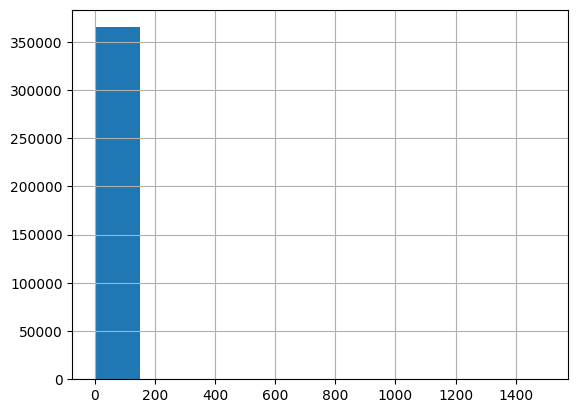

In [20]:
rules['lift'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

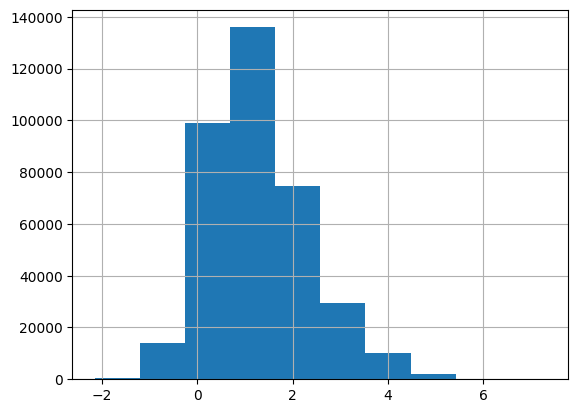

In [21]:
rules['lift_log'].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='zhangs_metric', ylabel='lift'>

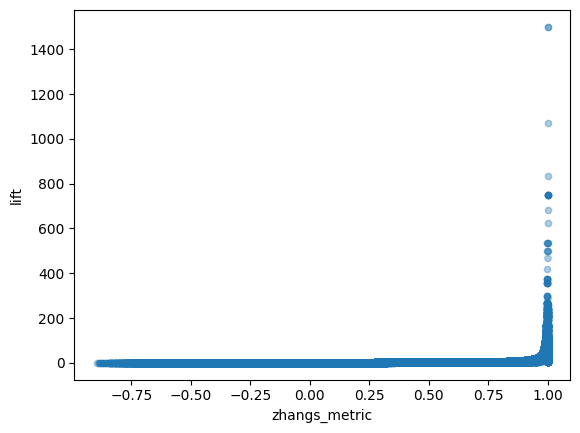

In [22]:
rules.plot(x='zhangs_metric', y= 'lift', kind='scatter',alpha=.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='lift'>

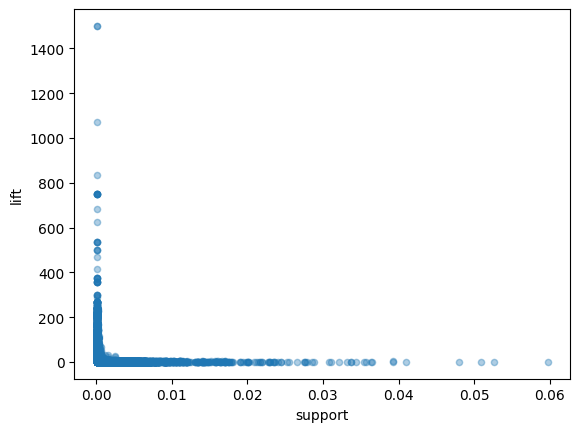

In [23]:
rules.plot(x='support', y= 'lift', kind='scatter', alpha=.2)

In [24]:
rules.sort_values(by='lift_log')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lift_log
201636,"(spaghetti, soup)",(cookies),0.014265,0.080389,0.000133,0.009346,0.116257,-0.001013,0.928286,-0.885211,-2.151954
201637,(cookies),"(spaghetti, soup)",0.080389,0.014265,0.000133,0.001658,0.116257,-0.001013,0.987373,-0.892080,-2.151954
4688,(cookies),(energy bar),0.080389,0.027063,0.000267,0.003317,0.122556,-0.001909,0.976175,-0.886174,-2.099184
4689,(energy bar),(cookies),0.027063,0.080389,0.000267,0.009852,0.122556,-0.001909,0.928761,-0.880364,-2.099184
113705,"(frozen vegetables, mineral water)",(butter),0.035729,0.030129,0.000133,0.003731,0.123844,-0.000943,0.973503,-0.880050,-2.088730
...,...,...,...,...,...,...,...,...,...,...,...
65183,"(spinach, blueberries)",(cream),0.000133,0.000933,0.000133,1.000000,1071.571429,0.000133,inf,0.999200,6.976881
295401,(napkins),"(shampoo, gluten free bar)",0.000667,0.000133,0.000133,0.200000,1500.200000,0.000133,1.249833,1.000000,7.313354
353392,"(tomato sauce, shampoo)",(napkins),0.000133,0.000667,0.000133,1.000000,1500.200000,0.000133,inf,0.999467,7.313354
353397,(napkins),"(tomato sauce, shampoo)",0.000667,0.000133,0.000133,0.200000,1500.200000,0.000133,1.249833,1.000000,7.313354


In [25]:
# Ordenar elementos dentro de antecedentes e consequentes
rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(sorted(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: frozenset(sorted(x)))

# Criar coluna auxiliar com regras ordenadas
rules['rule_set'] = rules.apply(lambda row: frozenset([row['antecedents'], row['consequents']]), axis=1)

# # Remoção de duplicidades
rules = rules.drop_duplicates(subset=['rule_set'])

# # Remoção da coluna auxiliar
rules.drop(columns = ['confidence', 'conviction'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-360884ca541a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules.drop(columns = ['confidence', 'conviction'], inplace=True)


In [26]:
# rules['lift_log_zscore'] = rules['lift_log'].apply(lambda x: (x - np.mean(rules['lift_log'])) / np.std(rules['lift_log']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# rules_thrs = rules[rules['lift_log_zscore'] < -2].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
rules_thrs = rules[rules['lift'] < 0.5].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from itertools import chain

rules_thrs['rule_set'] = rules_thrs['rule_set'].apply(lambda x: set(list(chain(*x))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
rules_thrs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set
122,(light cream),(almonds),0.015598,0.020397,0.000133,0.419027,-0.000185,-0.584795,-0.869820,"{light cream, almonds}"
146,(mushroom cream sauce),(almonds),0.019064,0.020397,0.000133,0.342840,-0.000256,-0.661483,-1.070491,"{mushroom cream sauce, almonds}"
162,(pasta),(almonds),0.015731,0.020397,0.000133,0.415476,-0.000188,-0.588370,-0.878331,"{pasta, almonds}"
254,(antioxydant juice),(cooking oil),0.008932,0.051060,0.000133,0.292311,-0.000323,-0.709541,-1.229936,"{antioxydant juice, cooking oil}"
262,(antioxydant juice),(eggs),0.008932,0.179709,0.000800,0.498317,-0.000805,-0.503926,-0.696519,"{antioxydant juice, eggs}"
...,...,...,...,...,...,...,...,...,...,...
360077,"(tomatoes, shrimp)",(pepper),0.011199,0.026530,0.000133,0.448732,-0.000164,-0.554052,-0.801330,"{tomatoes, pepper, shrimp}"
360167,"(pepper, spaghetti)",(tomato juice),0.009865,0.030396,0.000133,0.444583,-0.000167,-0.557864,-0.810619,"{pepper, tomato juice, spaghetti}"
360460,"(pet food, red wine)",(spaghetti),0.001600,0.174110,0.000133,0.478624,-0.000145,-0.521775,-0.736839,"{pet food, red wine, spaghetti}"
361288,"(rice, red wine)",(spaghetti),0.002533,0.174110,0.000133,0.302289,-0.000308,-0.698246,-1.196372,"{rice, red wine, spaghetti}"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
rules_thrs['rule_set']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


122                   {light cream, almonds}
146          {mushroom cream sauce, almonds}
162                         {pasta, almonds}
254         {antioxydant juice, cooking oil}
262                {antioxydant juice, eggs}
                         ...                
360077            {tomatoes, pepper, shrimp}
360167     {pepper, tomato juice, spaghetti}
360460       {pet food, red wine, spaghetti}
361288           {rice, red wine, spaghetti}
363180    {turkey, whole wheat rice, salmon}
Name: rule_set, Length: 1963, dtype: object

In [32]:
rules_thrs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set
122,(light cream),(almonds),0.015598,0.020397,0.000133,0.419027,-0.000185,-0.584795,-0.869820,"{light cream, almonds}"
146,(mushroom cream sauce),(almonds),0.019064,0.020397,0.000133,0.342840,-0.000256,-0.661483,-1.070491,"{mushroom cream sauce, almonds}"
162,(pasta),(almonds),0.015731,0.020397,0.000133,0.415476,-0.000188,-0.588370,-0.878331,"{pasta, almonds}"
254,(antioxydant juice),(cooking oil),0.008932,0.051060,0.000133,0.292311,-0.000323,-0.709541,-1.229936,"{antioxydant juice, cooking oil}"
262,(antioxydant juice),(eggs),0.008932,0.179709,0.000800,0.498317,-0.000805,-0.503926,-0.696519,"{antioxydant juice, eggs}"
...,...,...,...,...,...,...,...,...,...,...
360077,"(tomatoes, shrimp)",(pepper),0.011199,0.026530,0.000133,0.448732,-0.000164,-0.554052,-0.801330,"{tomatoes, pepper, shrimp}"
360167,"(pepper, spaghetti)",(tomato juice),0.009865,0.030396,0.000133,0.444583,-0.000167,-0.557864,-0.810619,"{pepper, tomato juice, spaghetti}"
360460,"(pet food, red wine)",(spaghetti),0.001600,0.174110,0.000133,0.478624,-0.000145,-0.521775,-0.736839,"{pet food, red wine, spaghetti}"
361288,"(rice, red wine)",(spaghetti),0.002533,0.174110,0.000133,0.302289,-0.000308,-0.698246,-1.196372,"{rice, red wine, spaghetti}"


In [33]:
# # Extrair conjuntos de antecedentes e consequentes únicos
# antecedents_set = set(item for rule in rules_thrs['antecedents'] for item in rule)
# consequents_set = set(item for rule in rules_thrs['consequents'] for item in rule)

# # Identificar instâncias que contêm ambos antecedentes e consequentes
# instances_with_rare_combinations = df_ohe[df_ohe[antecedents_set].all(axis=1) & df_ohe[consequents_set].all(axis=1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df_ohe['selected_items'] = df_ohe.apply(lambda row: set(df_ohe.columns[row == True]), axis=1)
# df_ohe['is_subset'] = df_ohe['selected_items'].apply(lambda x: any(x.issubset(rule_set) for rule_set in rules_thrs['rule_set']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Criar uma coluna indicando o ID da regra para a qual cada linha é um subconjunto
# df_ohe['matched_rule_id'] = df_ohe['selected_items'].apply(lambda x: next((rule_id for rule_id, rule_set in rules_thrs['rule_set'].items() if rule_set.issubset(x)), None))
df_ohe['matched_rule_ids'] = df_ohe['selected_items'].apply(lambda x: [rule_id for rule_id, rule_set in rules_thrs['rule_set'].items() if rule_set.issubset(x)])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df_ohe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini,selected_items,matched_rule_ids
0,False,True,True,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,"{almonds, olive oil, honey, antioxydant juice,...","[7112, 306546, 306652, 306654, 325744, 325746]"
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{eggs, meatballs, burgers}",[]
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,{chutney},[]
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{avocado, turkey}",[]
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,"{whole wheat rice, energy bar, green tea, milk...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{light mayo, butter, fresh bread}",[]
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{french fries, green tea, burgers, eggs, froze...",[]
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,{chicken},[]
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{green tea, escalope}",[]


In [37]:
# aux = df_ohe[['selected_items', 'matched_rule_ids']].copy()
# aux = aux.set_index('selected_items').explode('matched_rule_ids')
aux = df_ohe[['selected_items', 'matched_rule_ids']].explode('matched_rule_ids')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
results = aux.merge(rules_thrs, left_on='matched_rule_ids', right_index=True, how='left' )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
rules[rules['rule_set'].apply(lambda x: {'low fat yogurt'} in x)].sort_values(by=['lift'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set
42864,"(olive oil, babies food)",(low fat yogurt),0.000133,0.076523,0.000133,13.067944,0.000123,0.923600,2.570162,"((olive oil, babies food), (low fat yogurt))"
91235,"(burger sauce, cookies)",(low fat yogurt),0.000133,0.076523,0.000133,13.067944,0.000123,0.923600,2.570162,"((low fat yogurt), (burger sauce, cookies))"
136582,"(gums, carrots)",(low fat yogurt),0.000267,0.076523,0.000267,13.067944,0.000246,0.923723,2.570162,"((low fat yogurt), (gums, carrots))"
41340,"(butter, babies food)",(low fat yogurt),0.000133,0.076523,0.000133,13.067944,0.000123,0.923600,2.570162,"((butter, babies food), (low fat yogurt))"
338050,"(spinach, shampoo)",(low fat yogurt),0.000133,0.076523,0.000133,13.067944,0.000123,0.923600,2.570162,"((spinach, shampoo), (low fat yogurt))"
...,...,...,...,...,...,...,...,...,...,...
247745,"(pasta, escalope)",(low fat yogurt),0.005866,0.076523,0.000133,0.296999,-0.000316,-0.704228,-1.214027,"((low fat yogurt), (pasta, escalope))"
305866,"(hot dogs, green tea)",(low fat yogurt),0.006666,0.076523,0.000133,0.261359,-0.000377,-0.739930,-1.341861,"((hot dogs, green tea), (low fat yogurt))"
325716,"(milk, honey)",(low fat yogurt),0.007732,0.076523,0.000133,0.225309,-0.000458,-0.776043,-1.490281,"((low fat yogurt), (milk, honey))"
180863,"(chocolate, honey)",(low fat yogurt),0.007999,0.076523,0.000133,0.217799,-0.000479,-0.783566,-1.524182,"((low fat yogurt), (chocolate, honey))"


In [105]:
1/transactions.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0001333155579256099

In [112]:
# rules[rules['rule_set'].apply(lambda x: {'low fat yogurt'} in x)].sort_values(by=['lift'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
rules.loc[[325744,42864]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set
325744,"(olive oil, low fat yogurt)",(honey),0.006799,0.047460,0.000133,0.413142,-0.000189,-0.588511,-0.883965,"((olive oil, low fat yogurt), (honey))"
42864,"(olive oil, babies food)",(low fat yogurt),0.000133,0.076523,0.000133,13.067944,0.000123,0.923600,2.570162,"((olive oil, babies food), (low fat yogurt))"


In [113]:
# rules[rules['rule_set'].apply(lambda x: {'low fat yogurt'} in x)].sort_values(by=['lift'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
df_ohe[df_ohe['selected_items'].apply(lambda x: {'olive oil', 'honey','low fat yogurt'}.issubset(x))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini,selected_items,matched_rule_ids
0,False,True,True,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,"{almonds, olive oil, honey, antioxydant juice,...","[7112, 306546, 306652, 306654, 325744, 325746]"


In [115]:
df_ohe[df_ohe['selected_items'].apply(lambda x: {'olive oil', 'low fat yogurt'}.issubset(x))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini,selected_items,matched_rule_ids
0,False,True,True,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,"{almonds, olive oil, honey, antioxydant juice,...","[7112, 306546, 306652, 306654, 325744, 325746]"
638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,"{chocolate, french fries, whole wheat pasta, s...","[112738, 112739, 112740]"
709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,"{french fries, whole wheat pasta, light cream,...","[5760, 236296]"
751,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,"{whole wheat pasta, olive oil, low fat yogurt,...",[]
778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{light cream, soup, olive oil, low fat yogurt,...","[155602, 155608, 155609, 155610]"
841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{pancakes, french fries, light cream, cooking ...",[]
1050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{light cream, soup, olive oil, low fat yogurt,...",[]
1585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{tomatoes, shrimp, turkey, spaghetti, hot dogs...",[]
1715,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{french fries, soup, ground beef, green tea, c...","[262032, 285750]"
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,"{olive oil, spaghetti, low fat yogurt, milk}",[]


In [116]:
df_ohe[df_ohe['selected_items'].apply(lambda x: {'olive oil', 'babies food'}.issubset(x))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini,selected_items,matched_rule_ids
4974,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,"{tomato sauce, soup, ground beef, low fat yogu...","[832, 840, 344890]"


In [117]:
df_ohe[df_ohe['selected_items'].apply(lambda x: {'olive oil', 'babies food','low fat yogurt'}.issubset(x))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini,selected_items,matched_rule_ids
4974,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,"{tomato sauce, soup, ground beef, low fat yogu...","[832, 840, 344890]"


In [51]:
{'olive oil', 'honey','low fat yogurt'}.issubset(results['selected_items'].iloc[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [53]:
results.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selected_items,matched_rule_ids,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set
0,"{almonds, olive oil, honey, antioxydant juice,...",7112,(frozen smoothie),(salad),0.063325,0.004933,0.000133,0.426799,-0.000179,-0.589123,-0.851441,"{salad, frozen smoothie}"
0,"{almonds, olive oil, honey, antioxydant juice,...",306546,"(low fat yogurt, mineral water)",(green tea),0.023997,0.132116,0.001466,0.462557,-0.001704,-0.543475,-0.770984,"{green tea, low fat yogurt, mineral water}"
0,"{almonds, olive oil, honey, antioxydant juice,...",306652,"(green tea, shrimp)",(low fat yogurt),0.011465,0.076523,0.000400,0.455859,-0.000477,-0.547000,-0.785573,"{green tea, low fat yogurt, shrimp}"
0,"{almonds, olive oil, honey, antioxydant juice,...",306654,"(shrimp, low fat yogurt)",(green tea),0.006266,0.132116,0.000400,0.483135,-0.000428,-0.518434,-0.727458,"{green tea, low fat yogurt, shrimp}"
0,"{almonds, olive oil, honey, antioxydant juice,...",325744,"(olive oil, low fat yogurt)",(honey),0.006799,0.047460,0.000133,0.413142,-0.000189,-0.588511,-0.883965,"{low fat yogurt, olive oil, honey}"
0,"{almonds, olive oil, honey, antioxydant juice,...",325746,"(olive oil, honey)",(low fat yogurt),0.004799,0.076523,0.000133,0.362998,-0.000234,-0.638113,-1.013357,"{low fat yogurt, olive oil, honey}"
1,"{eggs, meatballs, burgers}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{chutney},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{avocado, turkey}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{whole wheat rice, energy bar, green tea, milk...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
stats.gmean(results.loc[0]['lift'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.43223046934030807

In [82]:
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selected_items,matched_rule_ids,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set,explicability
0,"{almonds, olive oil, honey, antioxydant juice,...",7112,(frozen smoothie),(salad),0.063325,0.004933,0.000133,0.426799,-0.000179,-0.589123,-0.851441,"{salad, frozen smoothie}","{'antecedents': (('frozen smoothie'), 0.063324..."
0,"{almonds, olive oil, honey, antioxydant juice,...",306546,"(low fat yogurt, mineral water)",(green tea),0.023997,0.132116,0.001466,0.462557,-0.001704,-0.543475,-0.770984,"{green tea, low fat yogurt, mineral water}","{'antecedents': (('low fat yogurt', 'mineral w..."
0,"{almonds, olive oil, honey, antioxydant juice,...",306652,"(green tea, shrimp)",(low fat yogurt),0.011465,0.076523,0.000400,0.455859,-0.000477,-0.547000,-0.785573,"{green tea, low fat yogurt, shrimp}","{'antecedents': (('green tea', 'shrimp'), 0.01..."
0,"{almonds, olive oil, honey, antioxydant juice,...",306654,"(shrimp, low fat yogurt)",(green tea),0.006266,0.132116,0.000400,0.483135,-0.000428,-0.518434,-0.727458,"{green tea, low fat yogurt, shrimp}","{'antecedents': (('shrimp', 'low fat yogurt'),..."
0,"{almonds, olive oil, honey, antioxydant juice,...",325744,"(olive oil, low fat yogurt)",(honey),0.006799,0.047460,0.000133,0.413142,-0.000189,-0.588511,-0.883965,"{low fat yogurt, olive oil, honey}","{'antecedents': (('olive oil', 'low fat yogurt..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,"{light mayo, butter, fresh bread}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'antecedents': (nan, nan), 'consequents:': (n..."
7497,"{french fries, green tea, burgers, eggs, froze...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'antecedents': (nan, nan), 'consequents:': (n..."
7498,{chicken},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'antecedents': (nan, nan), 'consequents:': (n..."
7499,"{green tea, escalope}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'antecedents': (nan, nan), 'consequents:': (n..."


In [121]:
results['explicability'] = results.apply(lambda row: {'antecedents': (row['antecedents'],row['antecedent support']),
                                                      'consequents:': (row['consequents'],row['consequent support']),
                                                      'support_combination': row['support'],
                                                      'lift': row['lift']} if not pd.isna(row['matched_rule_ids']) else np.nan, axis=1)
results['explicability'].iloc[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'antecedents': (frozenset({'frozen smoothie'}), 0.06332489001466471),
 'consequents:': (frozenset({'salad'}), 0.004932675643247567),
 'support_combination': 0.0001333155579256099,
 'lift': 0.4267994310099573}

In [122]:
# results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
from scipy import stats

# consolidate = results.groupby(results.index).agg({'selected_items':'first',
#                                     'matched_rule_ids': 'count',
#                                     # 'matched_rule_ids': lambda x: list(x),
#                                     'lift':lambda x: stats.gmean(x)})

consolidate = results.groupby(results.index).agg(
    selected_items=('selected_items', 'first'),
    matched_rule_ids_count=('matched_rule_ids', 'count'),
    matched_rule_ids=('matched_rule_ids', lambda x: list(x)),
    lift_gmean=('lift', lambda x: stats.gmean(x)),
    hierarchy_rules = ('explicability', lambda x :list(x))).reset_index(drop=True)

consolidate = consolidate.sort_values(by='lift_gmean', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
consolidate.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selected_items,matched_rule_ids_count,matched_rule_ids,lift_gmean,hierarchy_rules
2471,"{chocolate, french fries, escalope, whole whea...",1,[2936],0.172695,"[{'antecedents': (frozenset({'candy bars'}), 0..."
3787,"{whole wheat pasta, body spray, olive oil}",1,[1690],0.176561,"[{'antecedents': (frozenset({'body spray'}), 0..."
3816,"{mayonnaise, green tea, mushroom cream sauce, ...",3,"[232822, 232823, 232824]",0.177624,"[{'antecedents': (frozenset({'eggs', 'mushroom..."
4958,"{french fries, spaghetti, energy bar, fromage ...",3,"[263524, 263525, 263526]",0.178732,"[{'antecedents': (frozenset({'french fries', '..."
1076,"{salt, oil, low fat yogurt}",1,[8902],0.189390,"[{'antecedents': (frozenset({'salt'}), 0.00919..."


In [132]:
consolidate.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selected_items,matched_rule_ids_count,matched_rule_ids,lift_gmean,hierarchy_rules
7496,"{light mayo, butter, fresh bread}",0,[nan],NaN,[nan]
7497,"{french fries, green tea, burgers, eggs, froze...",0,[nan],NaN,[nan]
7498,{chicken},0,[nan],NaN,[nan]
7499,"{green tea, escalope}",0,[nan],NaN,[nan]
7500,"{eggs, frozen smoothie, yogurt cake, low fat y...",0,[nan],NaN,[nan]


In [125]:
consolidate['hierarchy_rules'].iloc[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'antecedents': (frozenset({'candy bars'}), 0.009732035728569524),
  'consequents:': (frozenset({'escalope'}), 0.0793227569657379),
  'support_combination': 0.0001333155579256099,
  'lift': 0.1726948313572004}]

In [127]:
rules.loc[2936]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                         (candy bars)
consequents                           (escalope)
antecedent support                      0.009732
consequent support                      0.079323
support                                 0.000133
lift                                    0.172695
leverage                               -0.000639
zhangs_metric                          -0.828698
lift_log                               -1.756229
rule_set              ((candy bars), (escalope))
Name: 2936, dtype: object

In [128]:
results['selected_items'].iloc[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'almonds',
 'antioxydant juice',
 'avocado',
 'cottage cheese',
 'energy drink',
 'frozen smoothie',
 'green grapes',
 'green tea',
 'honey',
 'low fat yogurt',
 'mineral water',
 'olive oil',
 'salad',
 'salmon',
 'shrimp',
 'spinach',
 'tomato juice',
 'vegetables mix',
 'whole weat flour',
 'yams'}

In [131]:
# results = df_ohe[['selected_items','is_subset', 'matched_rule_id']].merge(rules_thrs, left_on='matched_rule_id', right_index=True, how='left' )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
results.dropna().sort_values(by='lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,selected_items,is_subset,matched_rule_id,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set,lift_log_zscore
3694,"{olive oil, hand protein bar, green tea, cooki...",False,1542.0,(olive oil),(cookies),0.065858,0.080389,0.001600,0.302173,-0.003694,-0.711996,-1.196754,"{olive oil, cookies}",-4.243256
214,"{olive oil, mushroom cream sauce, cookies}",False,1542.0,(olive oil),(cookies),0.065858,0.080389,0.001600,0.302173,-0.003694,-0.711996,-1.196754,"{olive oil, cookies}",-4.243256
3606,"{spaghetti, frozen vegetables, cookies}",False,1512.0,(frozen vegetables),(cookies),0.095321,0.080389,0.002533,0.330559,-0.005130,-0.691220,-1.106969,"{frozen vegetables, cookies}",-4.052841
6316,"{pancakes, whole wheat rice, cookies, french f...",False,1512.0,(frozen vegetables),(cookies),0.095321,0.080389,0.002533,0.330559,-0.005130,-0.691220,-1.106969,"{frozen vegetables, cookies}",-4.052841
6257,"{milk, mushroom cream sauce, whole wheat rice,...",False,1512.0,(frozen vegetables),(cookies),0.095321,0.080389,0.002533,0.330559,-0.005130,-0.691220,-1.106969,"{frozen vegetables, cookies}",-4.052841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,"{olive oil, light cream, spaghetti, chocolate,...",False,2708.0,(yogurt cake),(frozen vegetables),0.027330,0.095321,0.002266,0.869978,-0.000339,-0.133189,-0.139288,"{yogurt cake, frozen vegetables}",-2.000602
6295,"{eggplant, eggs, fresh bread, yogurt cake, fro...",False,2708.0,(yogurt cake),(frozen vegetables),0.027330,0.095321,0.002266,0.869978,-0.000339,-0.133189,-0.139288,"{yogurt cake, frozen vegetables}",-2.000602
3071,"{nonfat milk, pancakes, cottage cheese, yogurt...",False,2708.0,(yogurt cake),(frozen vegetables),0.027330,0.095321,0.002266,0.869978,-0.000339,-0.133189,-0.139288,"{yogurt cake, frozen vegetables}",-2.000602
5770,"{flax seed, chocolate, frozen smoothie, clothe...",False,2708.0,(yogurt cake),(frozen vegetables),0.027330,0.095321,0.002266,0.869978,-0.000339,-0.133189,-0.139288,"{yogurt cake, frozen vegetables}",-2.000602


In [ ]:
# df_ohe

In [ ]:
# # Converter conjuntos em listas para permitir a mesclagem
# df_ohe['selected_items_list'] = df_ohe['selected_items'].apply(list)
# rules_thrs['rule_set_list'] = rules_thrs['rule_set'].apply(list)

# # Mesclar DataFrames usando as colunas convertidas
# merged_df = df_ohe.merge(rules_thrs, left_on='selected_items_list', right_on='rule_set_list')

# # Exibir o DataFrame resultante
# merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# rules_thrs# Criar conjunto de itens raros com base nas regras filtradas
# rare_items_set = set(item for rule in rules_thrs['antecedents'].append(rules_thrs['consequents']) for item in rule)

# # Filtrar instâncias que contêm combinações raras
# instances_with_rare_combinations = df_ohe[df_ohe[rare_items_set].any(axis=1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# rules.sort_values(by='lift_log_zscore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,lift,leverage,zhangs_metric,lift_log,rule_set,lift_log_zscore
1542,(cookies),(olive oil),0.080389,0.065858,0.001600,0.302173,-0.003694,-0.715200,-1.196754,"((cookies), (olive oil))",-4.243256
13474,"(mineral water, ground beef)",(cookies),0.040928,0.080389,0.001067,0.324156,-0.002224,-0.684931,-1.126532,"((cookies), (mineral water, ground beef))",-4.094329
1512,(cookies),(frozen vegetables),0.080389,0.095321,0.002533,0.330559,-0.005130,-0.687716,-1.106969,"((cookies), (frozen vegetables))",-4.052841
13492,"(milk, mineral water)",(cookies),0.047994,0.080389,0.001333,0.345541,-0.002525,-0.665496,-1.062645,"((milk, mineral water), (cookies))",-3.958839
1352,(chocolate),(meatballs),0.163845,0.020931,0.001200,0.349873,-0.002230,-0.689662,-1.050186,"((meatballs), (chocolate))",-3.932416
...,...,...,...,...,...,...,...,...,...,...,...
35385,"(escalope, french fries, mushroom cream sauce)",(pasta),0.002000,0.015731,0.001067,33.902825,0.001035,0.972449,3.523498,"((escalope, french fries, mushroom cream sauce...",5.767360
35382,"(pasta, escalope, french fries)",(mushroom cream sauce),0.001600,0.019064,0.001067,34.969697,0.001036,0.972960,3.554482,"((mushroom cream sauce), (pasta, escalope, fre...",5.833069
35386,"(pasta, escalope)","(french fries, mushroom cream sauce)",0.005866,0.004666,0.001067,38.966234,0.001039,0.980086,3.662695,"((french fries, mushroom cream sauce), (pasta,...",6.062566
35233,"(eggs, shrimp)","(pasta, mineral water)",0.014131,0.002133,0.001333,44.227594,0.001303,0.991400,3.789349,"((eggs, shrimp), (pasta, mineral water))",6.331170


In [ ]:
# rules['antecedents_len'] = rules['antecedents'].apply(len)
# rules['consequents_len'] = rules['consequents'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# rules['antecedents_len'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    13629
3     4436
1     2062
Name: antecedents_len, dtype: int64

In [ ]:
# rules['consequents_len'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    16800
2     3327
Name: consequents_len, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
